# Traffic Sign Recognition

## Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

The goals / steps of this project are the following:

+ Load the data set (see below for links to the project data set)
+ Explore, summarize and visualize the data set
+ Design, train and test a model architecture
+ Use the model to make predictions on new images
+ Analyze the softmax probabilities of the new images
+ Summarize the results with a written report

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../../traffic-signs-data/train.p"
validation_file = "../../traffic-signs-data/valid.p"
testing_file = "../../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### 1. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas.

I used the pandas library to calculate summary statistics of the traffic signs data set:

+ The size of training set is 34799
+ The size of the validation set is 4410
+ The size of test set is 12630
+ The shape of a traffic sign image is (32,32)
+ The number of unique classes/labels in the data set is 43 

In [2]:
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### 2. Exploratory visualization of the dataset

Here is an exploratory visualization of the data set. The bar charts display the class distribution of training set, validation set and testing set, respectively. As displayed, the distributions look relative similar and very screwed. some classes have more examples than other classes.

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

#### Plot class distribution in the training, validation, and test sets

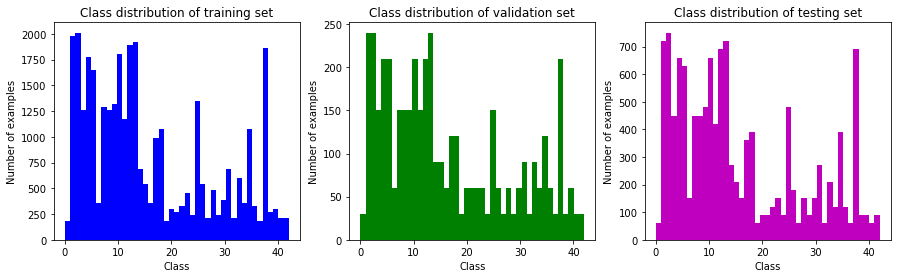

In [4]:
# Plot class distribution by class IDs
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
h_train = plt.hist(y_train, color='b', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(1,3,2)
h_validation = plt.hist(y_validation, color='g', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(1,3,3)
h_test = plt.hist(y_test, color='m', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

Below are class distribution displayed by sign names

Index(['ClassId', 'SignName'], dtype='object')


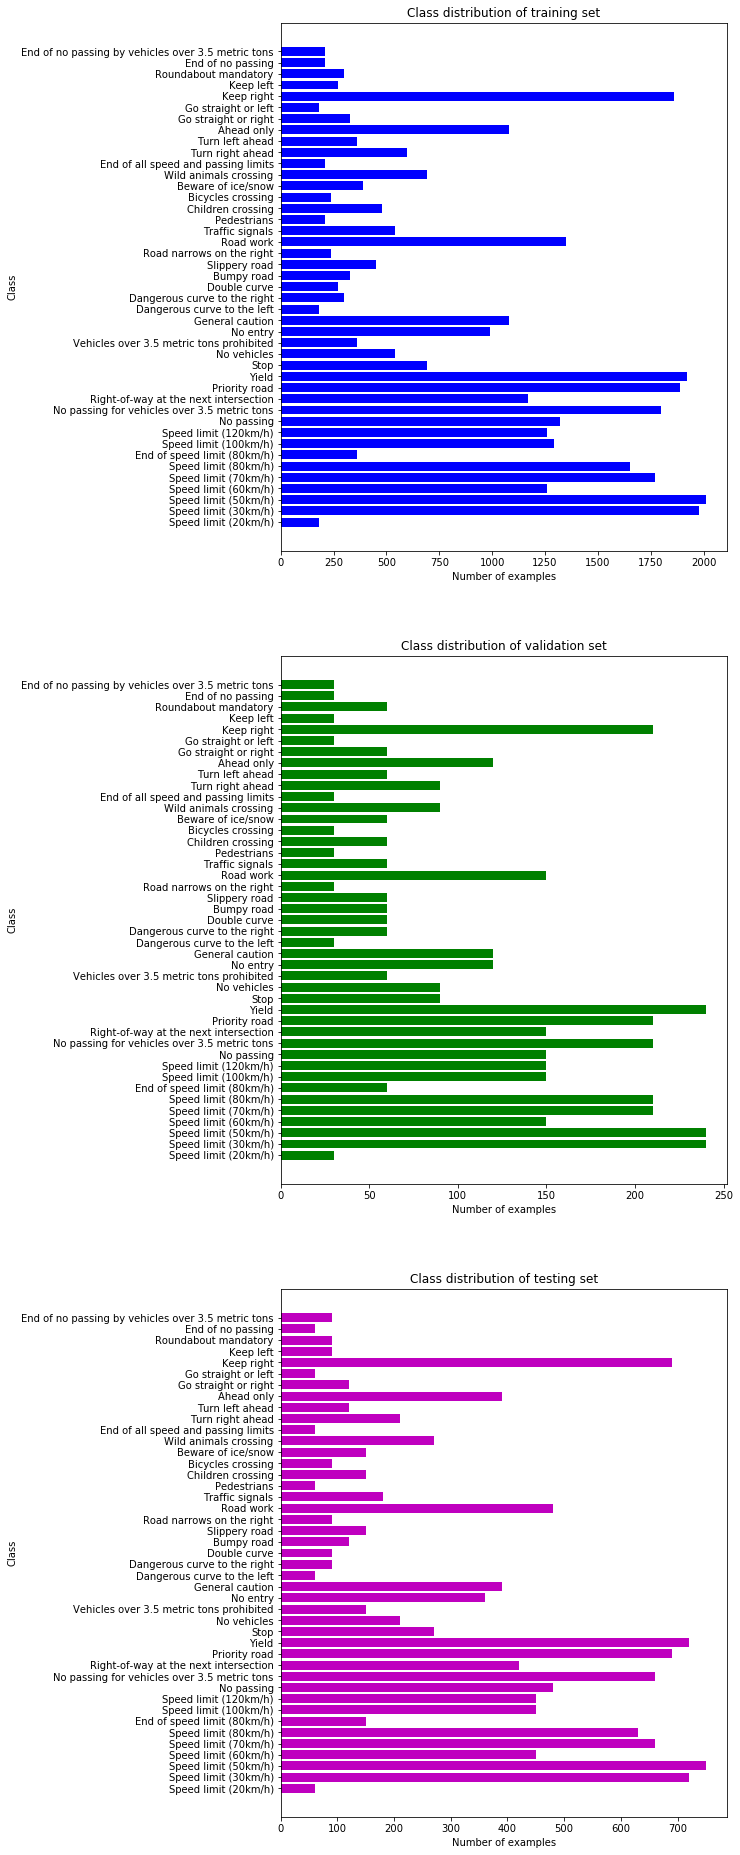

In [5]:
# Plot class distribution by sign names
signnames_file = "../../traffic-signs-data/signnames.csv"
signnames = pd.read_csv("signnames.csv")
print(signnames.columns)

# Display traffic sign names
plt.figure(figsize=(8,33))
plt.subplot(3,1,1)
plt.barh(signnames['ClassId'], h_train[0], color='b', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(3,1,2)
plt.barh(signnames['ClassId'], h_validation[0], color='g', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(3,1,3)
plt.barh(signnames['ClassId'], h_test[0], color='m', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

**Comment:** The class distribution of the training, validation, and test sets look the same. The distributions are skewed. We can generate fake data for better training performance by using image augmentation techniques such as image translation, rotation, brightness, distortion, etc.

#### Plot traffic sign images

The original images come with different sizes. However, in the dataset provided, the images already resized to 32x32 RGB images. Below I will show a random image with its information. Then I will plot a group of different classes and a group of image of the same class for better understanding the image characteristics.

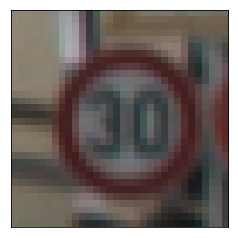

Original size: [38 38]
Class Id : 1
Sign name: Speed limit (30km/h)


In [6]:
# Plot a random resized image with its original size, class ID and sign name
sizes_train = train['sizes']
sizes_valid = valid['sizes']
sizes_test = test['sizes']
np.random.seed(0)
ind = np.random.randint(X_train.shape[0], size=1)[0]
plt.imshow(X_train[ind])
plt.xticks([]), plt.yticks([]), plt.show()
print("Original size: {}".format(sizes_train[ind]))
class_id = y_train[ind]
print("Class Id : {}".format(class_id))
print("Sign name: {}".format(signnames.SignName[class_id]))

In [7]:
# Plot multiple images with original size, class ID and sign name

def plot_images(X, y, cols=5, sign_name=None, orignal_size=None, cmap=None, func=None):
    """
    Show images and their information
    """
    num_images = len(X)
    rows = np.ceil(num_images/cols)
    plt.figure(figsize=(cols*3.5,rows*3))
    for i in range(X.shape[0]):
        image = X[i]
        plt.subplot(rows, cols, i+1)
        if func is not None:
            image = func(image)
        plt.imshow(image, cmap=cmap)
        plt.xticks([]), plt.yticks([])#, plt.show()   
        if sign_name is not None:
            class_id = y[i]
            plt.text(0, 0, '{}: {}'.format(class_id, sign_name.SignName[class_id]), color='black',backgroundcolor='orange', fontsize=8)        
        if orignal_size is not None:
            plt.text(0, image.shape[0], '{}'.format(orignal_size[i]), color='black',backgroundcolor='gray', fontsize=8)    
    plt.show()

def select_images(X, y, class_id=None, num_images=20):
    """
    Randomly select image's indices based on class_id
    """
    if class_id is not None:
        indices = np.where(y==class_id)[0]
    else:
        indices = np.where(y)[0]
    
    np.random.seed(0)
    ind = np.random.randint(np.size(indices), size=num_images)
    # print(indices[ind])
    print("Class: {}".format(np.unique(y[indices[ind]])))
    return indices[ind]    

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


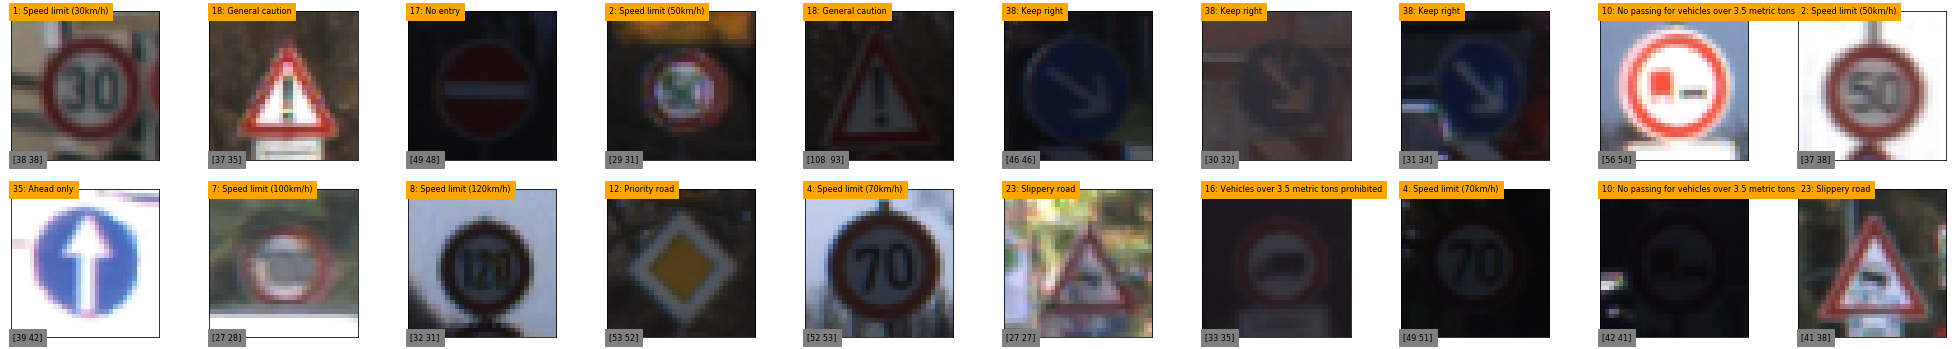

Class: [20]


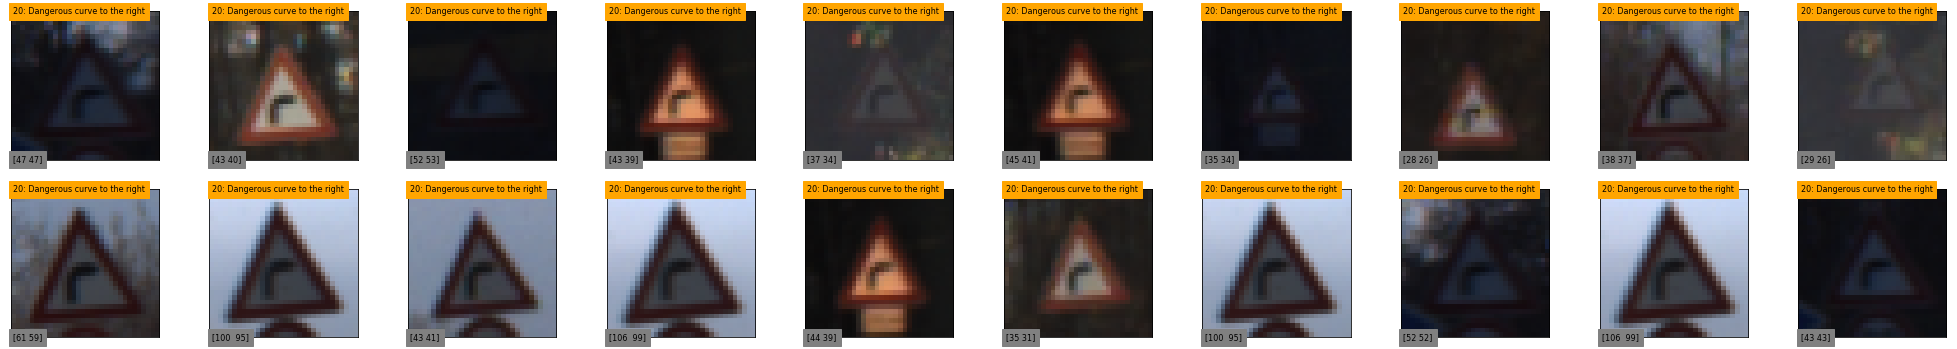

Class: [5]


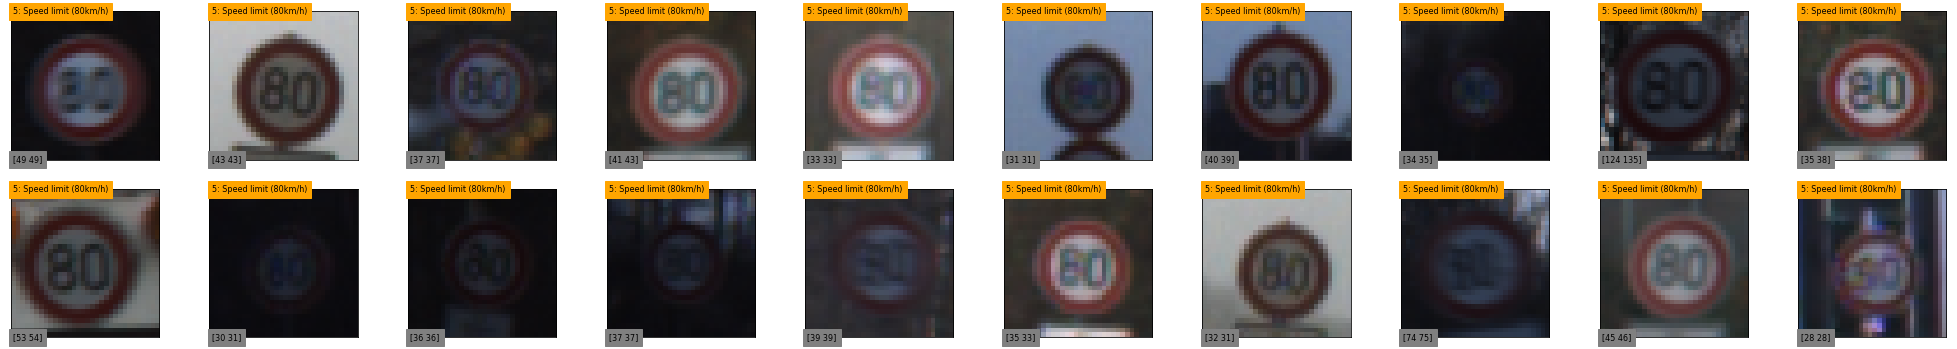

In [8]:
# Plot randomly 20 examples
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
# Randomly select image's indices based on class_id
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])

**Comment:** we can draw some conclusions about the image characteristics:
+ Images have different original size, making the signs are different in size --> This problem is already processed by scaling images to 32x32 in the downloaded dataset.
+ The brightness/darkness of the images are randomly different --> This problem can be improved by normalizing the images
+ Signs may be not straight and centered but slightly translated and rotated.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### 1. Pre-process the Data Set (normalization, grayscale, etc.)

Some pre-processing techniques are considered, firstly, converting the images from RGB to grayscale due to its efficiency in processing since grayscale images only have 1 channel compared to 3 channels of RGB images. However, I finds that colors contain some information that raw grayscale values cannot capture. Traffic signs often have a distinct color scheme, and it might be indicative of the information it is trying to convey (that is, red for stop signs and forbidden actions, green for informational signs, etc). So we can use the RGB images as input for the next steps in the trade off of the performance and computational cost. Even more, the RGB might not be informative enough. For example, a stop sign in broad daylight might appear very bright and clear, but its colors might appear much less vibrant on a rainy or foggy day. A better choice might be the HSV color space, which rearranges RGB color values in a cylindrical coordinate space along the axes of hue, saturation, and value (or brightness). So I might convert the RGB image to HSV color space and compare the testing results.

Another pre-processing method is normalization due to the variation of image brightness. The idea is to enhance the local intensity contrast of images so that we do not focus on the overall brightness of an image. Some normalization methods are considered and tested to get the best normalization method for this dataset.



In [9]:
import math
import cv2

# Convert an image from rgb to grayscale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Convert an image from rgb to hsv
def convert_hsv(img):
    """Convert image from rgb to hsv color space"""
    return cv2.cvtColor(x, cv2.COLOR_RGB2HSV)   
    
#Normalize the data for better brightness/darkness variation
#Implement Min-Max scaling for grayscale image data
def normalize(x, method=1):
    """
    For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data 
    and can be used in this project
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    if method == 1:
        x_scaled = (x - 128)/128
    if method == 2:
        x_scaled = (x - x.mean())/x.std()
    return x_scaled   

Here is the example of above traffic sign images after grayscaling.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


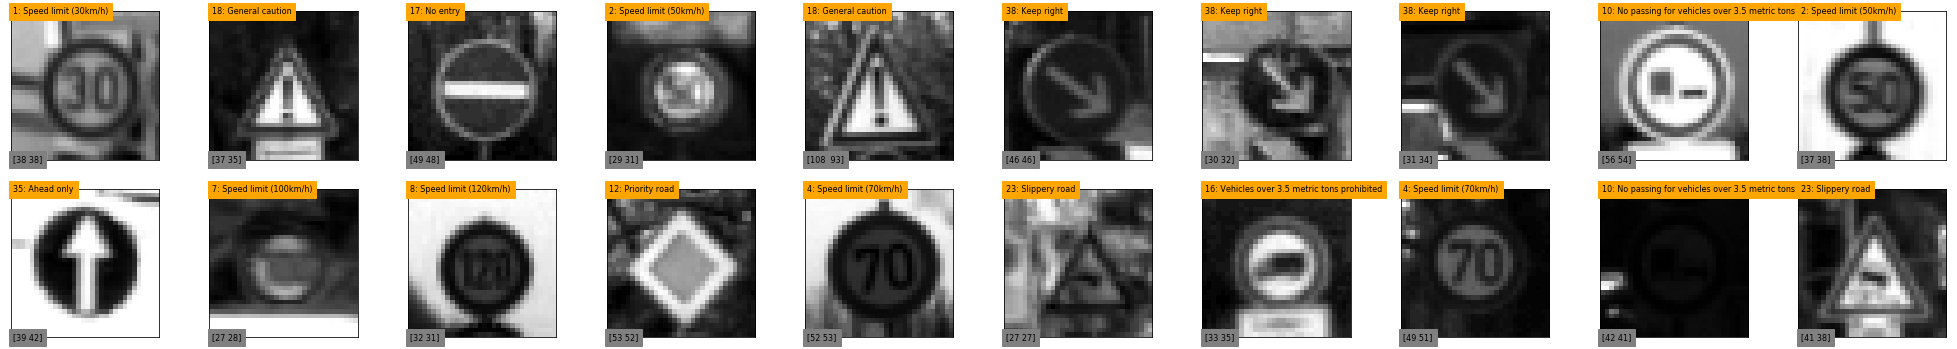

Class: [20]


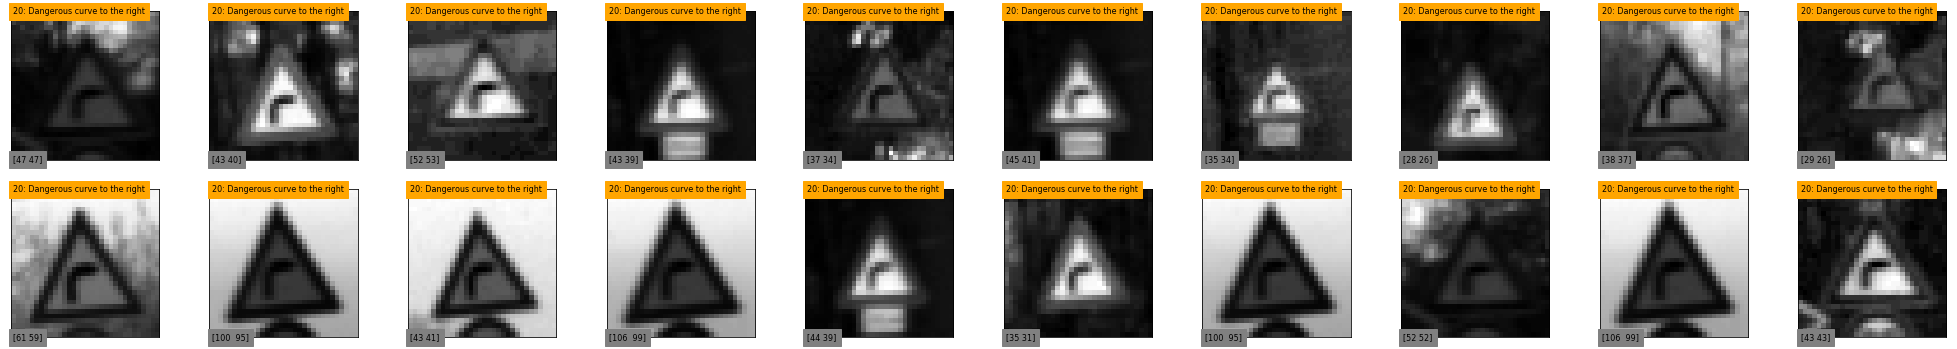

Class: [5]


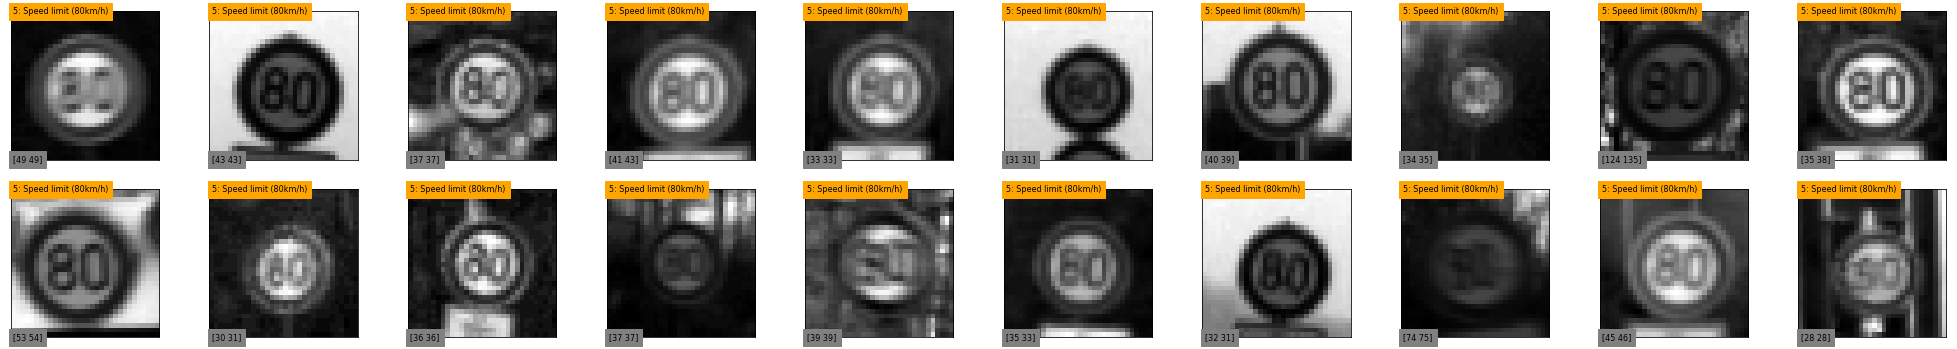

In [10]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)

And below is the example of above traffic sign images after normalizing.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


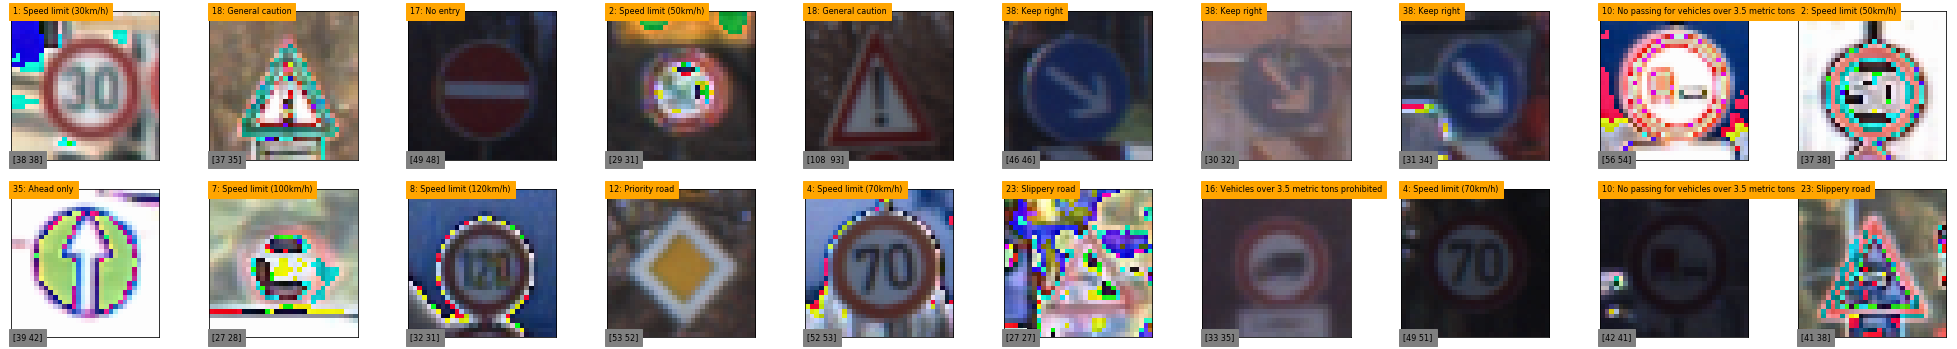

Class: [20]


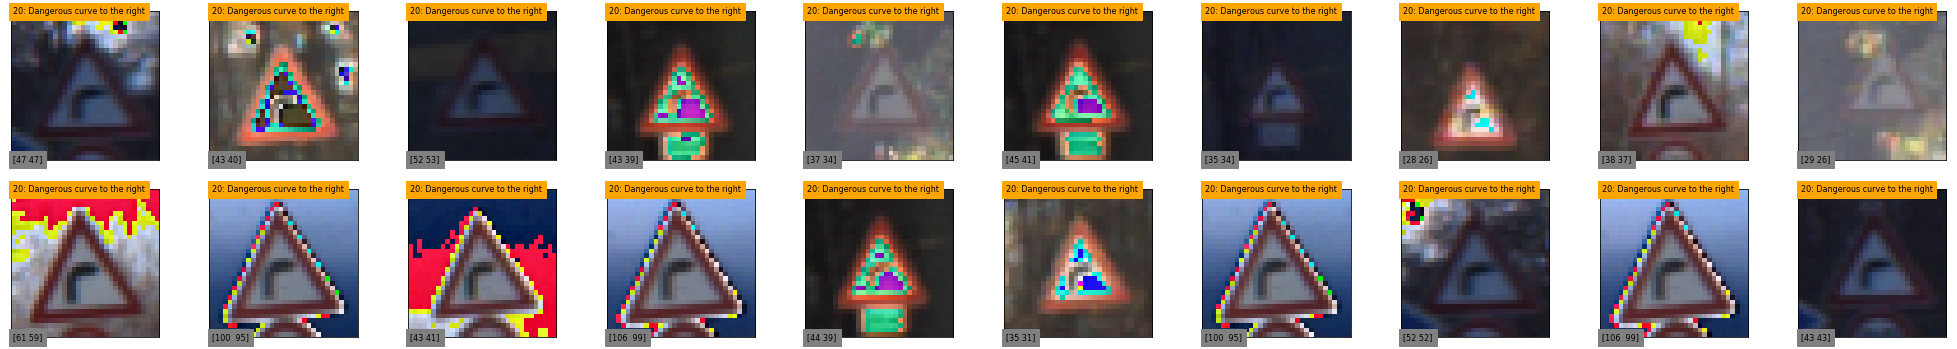

Class: [5]


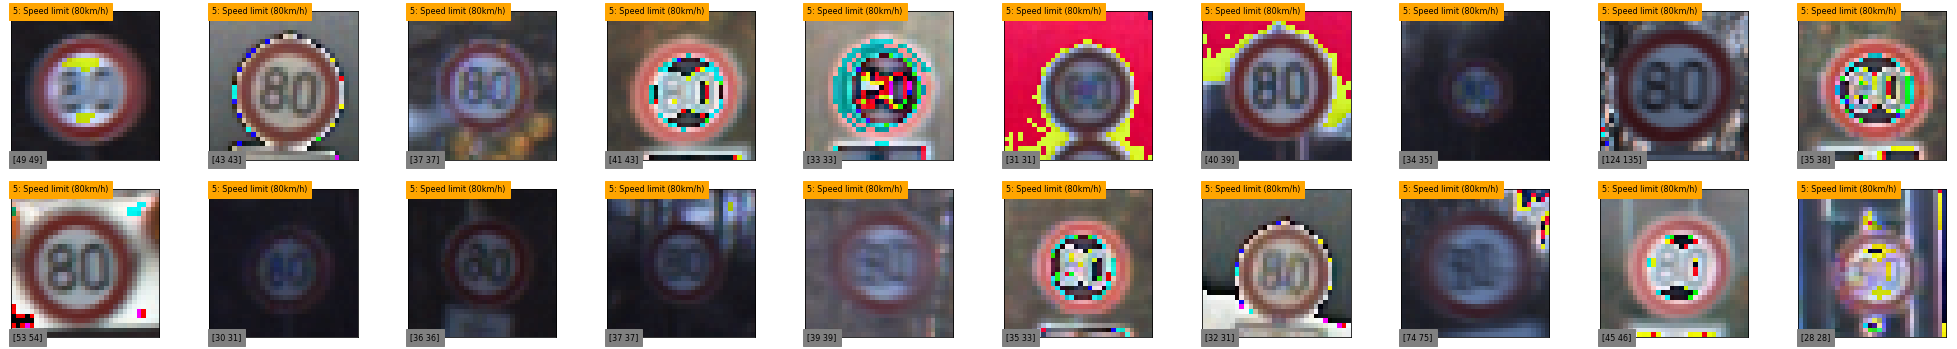

In [11]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=normalize)

Since the class distributions are skewed, additional data is generated based on the current data with some modifications based on the image characteristics that the signs may be not straight and centered but slightly translated and rotated. Some image augmentation methods are considered such as translation, rotation, distortion, brightness adjustment, etc.

In [12]:
def rotate_image(img, angle):
    """
    Randomly rotate the image within the provided angle
    """
    if angle == 0:
        return img
    angle = np.random.uniform(-angle, angle)
    num_rows, num_cols = img.shape[:2]
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), angle, 1)
    img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return img_rotation


def translate_image(img, translation):
    """
    Randomly move the image horizontally and vertically within provided translation pixel
    """
    if translation == 0:
        return 0
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)  
    num_rows, num_cols = img.shape[:2]
    translation_matrix = np.float32([ [1,0,x], [0,1,y] ])
    img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    return img_translation

def distort_image(img, shear):
    """
    Randomly distort the image horizontally and vertically within a provided amount
    """
    if shear == 0:
        return img
    num_rows, num_cols = img.shape[:2]
    left, right, top, bottom = shear, num_cols - shear, shear, num_rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    src_points = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    dst_points = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    affine_matrix = cv2.getAffineTransform(src_points,dst_points)
    img_distortion = cv2.warpAffine(img, affine_matrix, (num_cols, num_rows))
    return img_distortion

def adjust_brightness(img, ratio):
    """
    Randomly adjust brightness of the image.
    """
    # Change image to HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Get only v channel for brightness adjustment
    brightness = np.float64(hsv[:, :, 2])
    # Add random brightness adjustment
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))   
    brightness[brightness>255] = 255
    brightness[brightness<0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
def augment_image(img, angle=5.0, translation=3, shear=2, ratio=0.5):
    img = rotate_image(img, angle)
    img = translate_image(img, translation)
    img = distort_image(img, shear)
    img = adjust_brightness(img, ratio)
    return img

And below is the example of above traffic sign images after augmentation with default parameters.

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


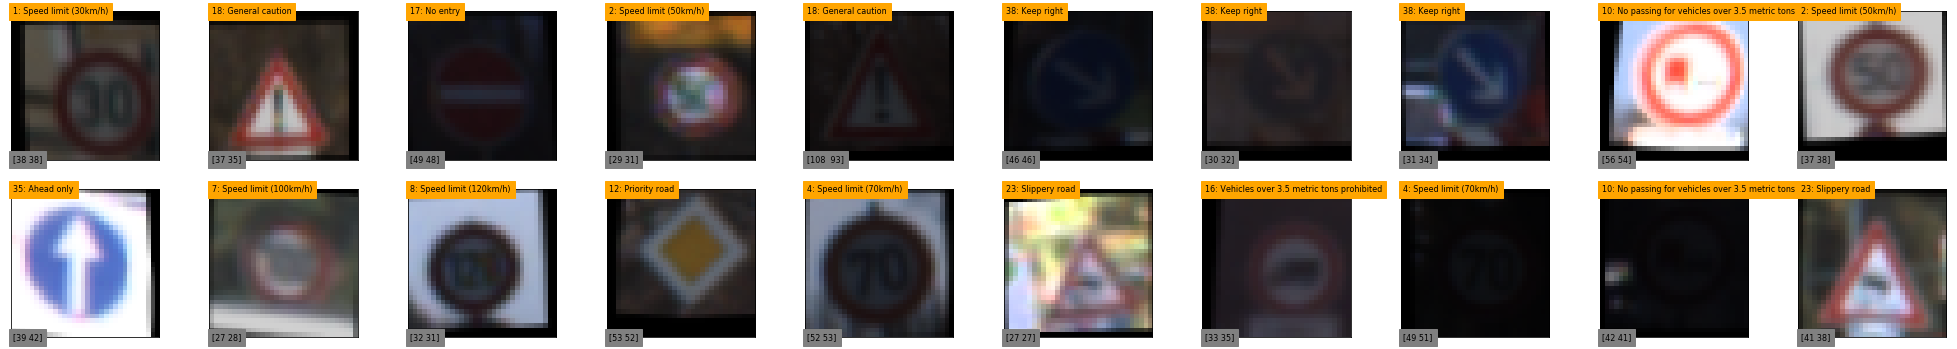

Class: [20]


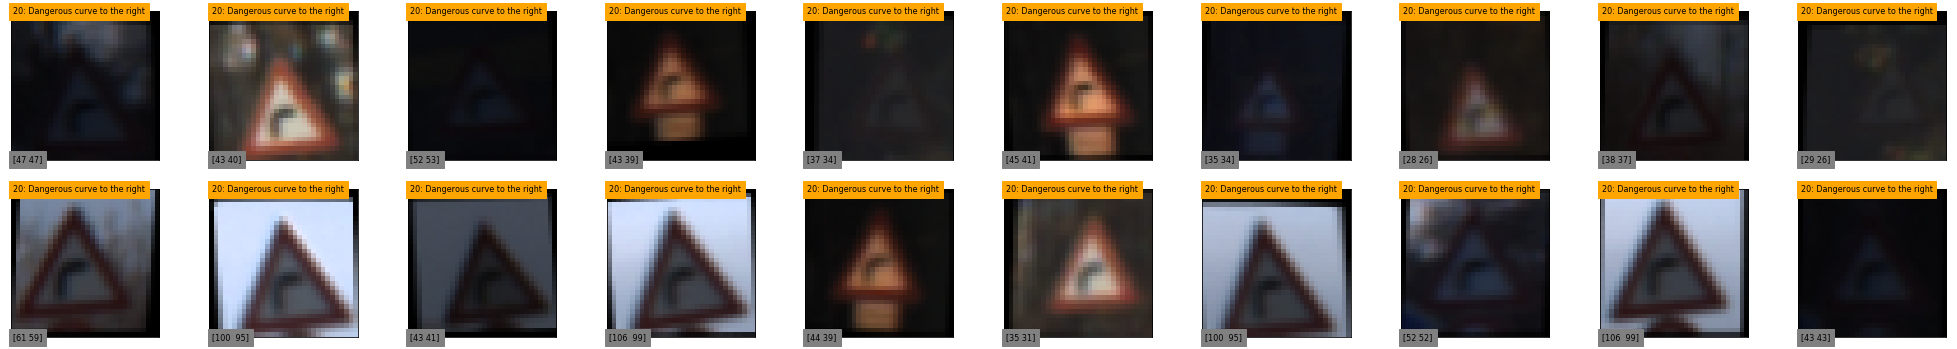

Class: [5]


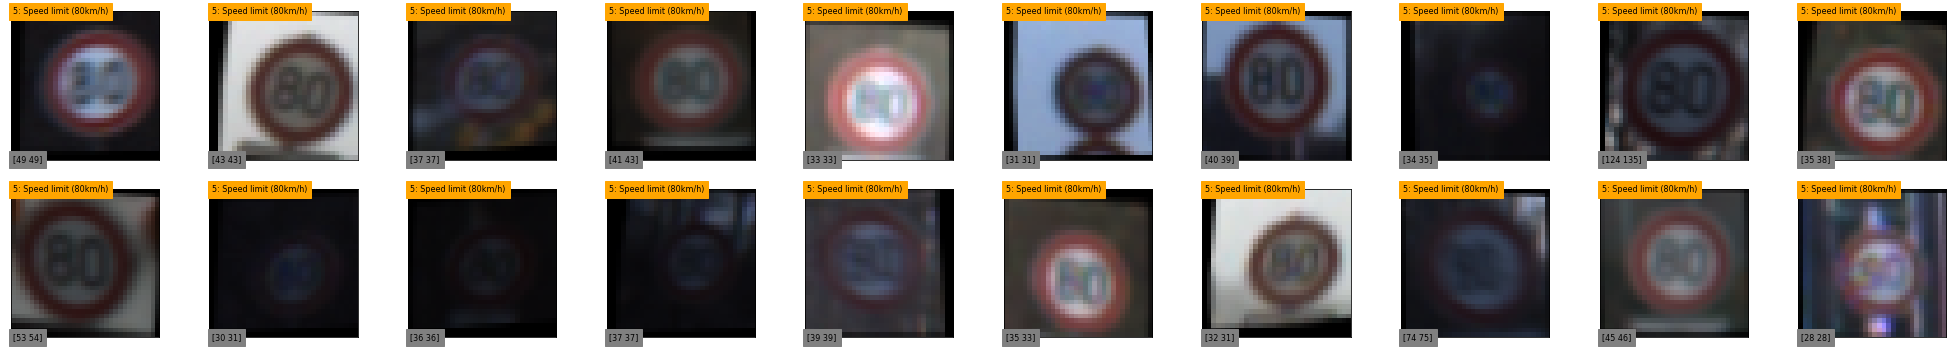

In [13]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)

### 2. Model Architecture

The model is based on LeNet by Yann LeCun. It is a convolutional neural network designed to recognize visual patterns directly from pixel images with minimal preprocessing. It can handle hand-written characters very well. I believe that with some image pre-processing, this model architect can be applied well to our dataset.

Source: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

![LeNet Architecture](lenet.png)
Source: Yan LeCun

The inputs are 32x32 (1 channel) images

Convolution layers uses 2x2 sub-sampling (valid padding, max pooling, no dropout)

First fully connected layer includes 120 output.

Second fully connected layer includes 84 output corresponding to 7x12 bitmap for each class, which is a label. 

Third fully connected layer includes 10 output corresponding to 10 classes (the digits '0' - '9')

The output is compared with all the labels (bitmaps) to calculate the error

The class with the smallest error is an estimated digit value

My final model consisted of the following layers:

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x12	| 1x1 stride, valid padding, outputs 28x28x12
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x12
Convolution 5x5x32	| 1x1 stride, valid padding, outputs 10x10x32
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x32
Flatten | outputs 800
Fully connected	| outputs 240
ReLU |
Fully connected	| outputs n_classes
Softmax	|

In [14]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# LeNet based CNN
def sign_cnn(x, conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43)):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6, conv1_shape=(5, 5, 3, 6)
    conv1_W = tf.Variable(tf.truncated_normal(shape=conv1_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_shape[3]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16, conv2_shape=(5, 5, 6, 16)
    conv2_W = tf.Variable(tf.truncated_normal(shape=conv2_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_shape[3]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120, fc1_shape=(400, 120)
    fc1_W = tf.Variable(tf.truncated_normal(shape=fc1_shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(fc1_shape[1]))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 43, fc2_shape=(120, 43)
    fc2_W = tf.Variable(tf.truncated_normal(shape=fc2_shape, mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(fc2_shape[1]))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return signs



### 3. Train, Validate and Test the Model

To train the model, I used a training pipeline using Adam optimizer, the batch size is 128, number of epochs is 10 and learning rate = 0.001. The number of epochs and batch size affect the training speed and model accuracy.

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.


In [15]:
def evaluate(X_data, y_data, accuracy_operation, batch_size, x, y):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples   
    
def sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=10, batch_size=128, learning_rate=0.001, save_path='checkpoint/network.ckpt', isPlot=True):
    
    # Features and Labels
    # Train cnn to classify sign data. 
    # x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
    #input_shape=(None, 32, 32, 3)
    x = tf.placeholder(tf.float32, input_shape)
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, n_classes)
    
    # Training Pipeline: Create a training pipeline that uses the model to classify sign data.
    signs = sign_cnn(x, conv1_shape, conv2_shape, fc1_shape, fc2_shape)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=signs)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)
    
    # Model Evaluation: Evaluate how well the loss and accuracy of the model for a given dataset.
    correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Model testing
    prediction = tf.argmax(signs, 1, name='prediction')
    probability = tf.nn.softmax(signs, name='probability')
    k = tf.placeholder(tf.int32, name='k')
    top_k = tf.nn.top_k(probability, k=k) 
    
    saver = tf.train.Saver()
 
    # Train the Model: Run the training data through the training pipeline to train the model. 
    # Before each epoch, shuffle the training set. 
    # After each epoch, measure the loss and accuracy of the validation set. 
    # Save the model after training.
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        train_accuracy=[]
        validation_accuracy =[]
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            train_accuracy.append(evaluate(X_train, y_train, accuracy_operation, batch_size, x, y))
            validation_accuracy.append(evaluate(X_validation, y_validation, accuracy_operation, batch_size, x, y))
            print("EPOCH {} ...".format(i+1))
            print("Train Accuracy = {:.3f}".format(train_accuracy[i]))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))

        saver.save(sess, save_path)
        print("Model saved")
        
        if isPlot==True:
            plt.figure()
            plt.plot(range(len(train_accuracy)), train_accuracy, color='blue', label="Train")
            plt.plot(range(len(validation_accuracy)), validation_accuracy, color='green', label="Validation")
            plt.xlabel("Epochs"), plt.ylabel("Accuracy"), plt.title("Train Accuracy and Validation Accuracy over Epochs")
            plt.ylim(ymax=1)
            plt.legend()
        
    return

My final model results were:

training set accuracy of 1.000

validation set accuracy of 0.947

test set accuracy of 0.923


### 4. Describe the approach taken for finding a solution

**First, I started with the LeNet-based architect without image pre-processing.**

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x6	| 1x1 stride, valid padding, outputs 28x28x6
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x6
Convolution 5x5x16	| 1x1 stride, valid padding, outputs 10x10x16
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x16
Flatten | outputs 400
Fully connected	| outputs 120
ReLU |
Fully connected	| outputs n_classes
Softmax	|

Training...

EPOCH 1 ...
Train Accuracy = 0.588
Validation Accuracy = 0.534
EPOCH 2 ...
Train Accuracy = 0.793
Validation Accuracy = 0.704
EPOCH 3 ...
Train Accuracy = 0.876
Validation Accuracy = 0.771
EPOCH 4 ...
Train Accuracy = 0.897
Validation Accuracy = 0.779
EPOCH 5 ...
Train Accuracy = 0.930
Validation Accuracy = 0.809
EPOCH 6 ...
Train Accuracy = 0.939
Validation Accuracy = 0.814
EPOCH 7 ...
Train Accuracy = 0.954
Validation Accuracy = 0.835
EPOCH 8 ...
Train Accuracy = 0.964
Validation Accuracy = 0.840
EPOCH 9 ...
Train Accuracy = 0.957
Validation Accuracy = 0.836
EPOCH 10 ...
Train Accuracy = 0.969
Validation Accuracy = 0.844
Model saved


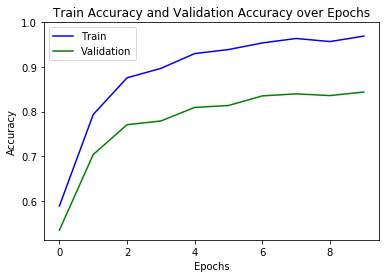

In [16]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=10, batch_size=128, learning_rate=0.001, save_path='checkpoint/network01.ckpt')

The result shows vadidation accuracy is still a little bit low. Validation accuracy still increases when train accuracy increases, so I re-run the network with more epochs.

Training...

EPOCH 1 ...
Train Accuracy = 0.809
Validation Accuracy = 0.705
EPOCH 2 ...
Train Accuracy = 0.917
Validation Accuracy = 0.798
EPOCH 3 ...
Train Accuracy = 0.943
Validation Accuracy = 0.808
EPOCH 4 ...
Train Accuracy = 0.954
Validation Accuracy = 0.818
EPOCH 5 ...
Train Accuracy = 0.975
Validation Accuracy = 0.832
EPOCH 6 ...
Train Accuracy = 0.982
Validation Accuracy = 0.858
EPOCH 7 ...
Train Accuracy = 0.987
Validation Accuracy = 0.863
EPOCH 8 ...
Train Accuracy = 0.982
Validation Accuracy = 0.854
EPOCH 9 ...
Train Accuracy = 0.987
Validation Accuracy = 0.875
EPOCH 10 ...
Train Accuracy = 0.990
Validation Accuracy = 0.857
EPOCH 11 ...
Train Accuracy = 0.991
Validation Accuracy = 0.873
EPOCH 12 ...
Train Accuracy = 0.989
Validation Accuracy = 0.868
EPOCH 13 ...
Train Accuracy = 0.991
Validation Accuracy = 0.874
EPOCH 14 ...
Train Accuracy = 0.991
Validation Accuracy = 0.870
EPOCH 15 ...
Train Accuracy = 0.993
Validation Accuracy = 0.877
EPOCH 16 ...
Train Accuracy = 0.984


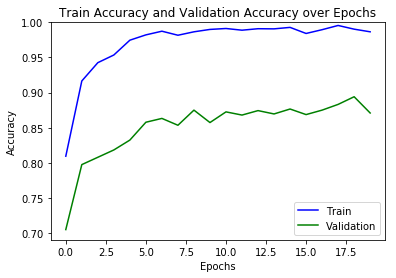

In [20]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network01.ckpt')



Then, I applied pre-processing methods separately to see which method is useful for this dataset.

**Apply grayscale and run the network again**

Training...

EPOCH 1 ...
Train Accuracy = 0.859
Validation Accuracy = 0.770
EPOCH 2 ...
Train Accuracy = 0.944
Validation Accuracy = 0.846
EPOCH 3 ...
Train Accuracy = 0.960
Validation Accuracy = 0.864
EPOCH 4 ...
Train Accuracy = 0.979
Validation Accuracy = 0.871
EPOCH 5 ...
Train Accuracy = 0.982
Validation Accuracy = 0.874
EPOCH 6 ...
Train Accuracy = 0.987
Validation Accuracy = 0.890
EPOCH 7 ...
Train Accuracy = 0.986
Validation Accuracy = 0.884
EPOCH 8 ...
Train Accuracy = 0.990
Validation Accuracy = 0.893
EPOCH 9 ...
Train Accuracy = 0.995
Validation Accuracy = 0.894
EPOCH 10 ...
Train Accuracy = 0.983
Validation Accuracy = 0.880
EPOCH 11 ...
Train Accuracy = 0.993
Validation Accuracy = 0.904
EPOCH 12 ...
Train Accuracy = 0.992
Validation Accuracy = 0.889
EPOCH 13 ...
Train Accuracy = 0.994
Validation Accuracy = 0.895
EPOCH 14 ...
Train Accuracy = 0.986
Validation Accuracy = 0.885
EPOCH 15 ...
Train Accuracy = 0.991
Validation Accuracy = 0.891
EPOCH 16 ...
Train Accuracy = 0.989


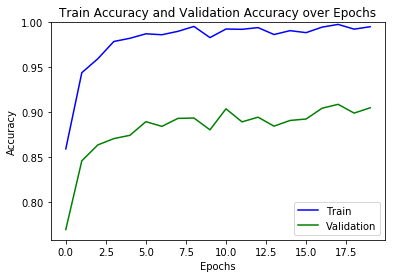

In [21]:
# for grayscale, we need to add the 3rd dimension back (1 channel) as it's expected by the network
X_train_pre = np.array([grayscale(x)[:, :, np.newaxis] for x in X_train])
X_validation_pre = np.array([grayscale(x)[:, :, np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network02.ckpt')

The train accuracy and validation accuracy improved but not as required.

**Apply normalization and run the network again with more epochs**

Training...

EPOCH 1 ...
Train Accuracy = 0.906
Validation Accuracy = 0.810
EPOCH 2 ...
Train Accuracy = 0.959
Validation Accuracy = 0.845
EPOCH 3 ...
Train Accuracy = 0.978
Validation Accuracy = 0.873
EPOCH 4 ...
Train Accuracy = 0.986
Validation Accuracy = 0.899
EPOCH 5 ...
Train Accuracy = 0.992
Validation Accuracy = 0.901
EPOCH 6 ...
Train Accuracy = 0.996
Validation Accuracy = 0.907
EPOCH 7 ...
Train Accuracy = 0.994
Validation Accuracy = 0.906
EPOCH 8 ...
Train Accuracy = 0.996
Validation Accuracy = 0.907
EPOCH 9 ...
Train Accuracy = 0.995
Validation Accuracy = 0.897
EPOCH 10 ...
Train Accuracy = 0.996
Validation Accuracy = 0.896
EPOCH 11 ...
Train Accuracy = 0.999
Validation Accuracy = 0.910
EPOCH 12 ...
Train Accuracy = 0.996
Validation Accuracy = 0.900
EPOCH 13 ...
Train Accuracy = 0.996
Validation Accuracy = 0.906
EPOCH 14 ...
Train Accuracy = 0.993
Validation Accuracy = 0.911
EPOCH 15 ...
Train Accuracy = 0.999
Validation Accuracy = 0.912
EPOCH 16 ...
Train Accuracy = 1.000


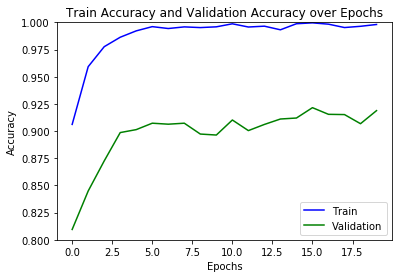

In [22]:
X_train_pre = np.array([normalize(x, method=2) for x in X_train])
X_validation_pre = np.array([normalize(x, method=2) for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network03.ckpt')

The train accuracy and validation accuracy improved also, better than grayscale's one.

**Apply augmentation and run the network**

Training...

EPOCH 1 ...
Train Accuracy = 0.150
Validation Accuracy = 0.153
EPOCH 2 ...
Train Accuracy = 0.361
Validation Accuracy = 0.365
EPOCH 3 ...
Train Accuracy = 0.476
Validation Accuracy = 0.457
EPOCH 4 ...
Train Accuracy = 0.553
Validation Accuracy = 0.531
EPOCH 5 ...
Train Accuracy = 0.589
Validation Accuracy = 0.581
EPOCH 6 ...
Train Accuracy = 0.642
Validation Accuracy = 0.601
EPOCH 7 ...
Train Accuracy = 0.674
Validation Accuracy = 0.627
EPOCH 8 ...
Train Accuracy = 0.702
Validation Accuracy = 0.677
EPOCH 9 ...
Train Accuracy = 0.725
Validation Accuracy = 0.676
EPOCH 10 ...
Train Accuracy = 0.751
Validation Accuracy = 0.690
EPOCH 11 ...
Train Accuracy = 0.761
Validation Accuracy = 0.701
EPOCH 12 ...
Train Accuracy = 0.799
Validation Accuracy = 0.724
EPOCH 13 ...
Train Accuracy = 0.786
Validation Accuracy = 0.705
EPOCH 14 ...
Train Accuracy = 0.825
Validation Accuracy = 0.716
EPOCH 15 ...
Train Accuracy = 0.852
Validation Accuracy = 0.754
EPOCH 16 ...
Train Accuracy = 0.847


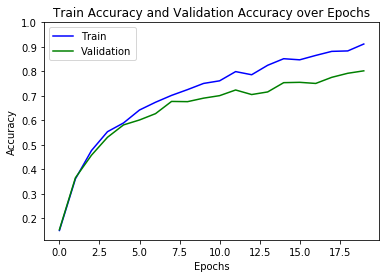

In [23]:
X_train_pre = np.array([augment_image(x) for x in X_train])
#X_validation_pre = np.array([normalize(x) for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network04.ckpt')

The train accuracy and validation accuracy did not improved. May be need running with more epochs to see the accuracy at stable status.

**Apply both grayscale and normalization and run the network again with epochs=20**

Training...

EPOCH 1 ...
Train Accuracy = 0.909
Validation Accuracy = 0.816
EPOCH 2 ...
Train Accuracy = 0.957
Validation Accuracy = 0.872
EPOCH 3 ...
Train Accuracy = 0.976
Validation Accuracy = 0.881
EPOCH 4 ...
Train Accuracy = 0.987
Validation Accuracy = 0.890
EPOCH 5 ...
Train Accuracy = 0.991
Validation Accuracy = 0.905
EPOCH 6 ...
Train Accuracy = 0.989
Validation Accuracy = 0.908
EPOCH 7 ...
Train Accuracy = 0.994
Validation Accuracy = 0.904
EPOCH 8 ...
Train Accuracy = 0.997
Validation Accuracy = 0.918
EPOCH 9 ...
Train Accuracy = 0.995
Validation Accuracy = 0.921
EPOCH 10 ...
Train Accuracy = 0.995
Validation Accuracy = 0.905
EPOCH 11 ...
Train Accuracy = 0.994
Validation Accuracy = 0.913
EPOCH 12 ...
Train Accuracy = 0.998
Validation Accuracy = 0.921
EPOCH 13 ...
Train Accuracy = 0.995
Validation Accuracy = 0.911
EPOCH 14 ...
Train Accuracy = 0.997
Validation Accuracy = 0.901
EPOCH 15 ...
Train Accuracy = 0.999
Validation Accuracy = 0.923
EPOCH 16 ...
Train Accuracy = 0.998


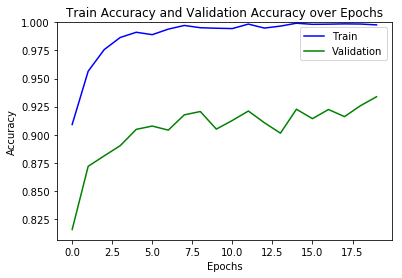

In [24]:
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 6), conv2_shape=(5, 5, 6, 16), fc1_shape=(400, 120), fc2_shape=(120, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network05.ckpt')

Model improved but need to consider different condition of network to get better performance.

**Double network settings on original dataset**

Layer        | Description
------------ | -------------
Input	| 32x32x3 RGB image
Convolution 5x5x12	| 1x1 stride, valid padding, outputs 28x28x12
ReLU |	
Max pooling	| 2x2 stride, outputs 14x14x12
Convolution 5x5x32	| 1x1 stride, valid padding, outputs 10x10x32
ReLU	|
Max pooling	| 2x2 stride, outputs 5x5x32
Flatten | outputs 800
Fully connected	| outputs 240
ReLU |
Fully connected	| outputs n_classes
Softmax	|


Training...

EPOCH 1 ...
Train Accuracy = 0.721
Validation Accuracy = 0.599
EPOCH 2 ...
Train Accuracy = 0.868
Validation Accuracy = 0.741
EPOCH 3 ...
Train Accuracy = 0.924
Validation Accuracy = 0.800
EPOCH 4 ...
Train Accuracy = 0.957
Validation Accuracy = 0.821
EPOCH 5 ...
Train Accuracy = 0.965
Validation Accuracy = 0.825
EPOCH 6 ...
Train Accuracy = 0.977
Validation Accuracy = 0.842
EPOCH 7 ...
Train Accuracy = 0.974
Validation Accuracy = 0.834
EPOCH 8 ...
Train Accuracy = 0.977
Validation Accuracy = 0.864
EPOCH 9 ...
Train Accuracy = 0.973
Validation Accuracy = 0.841
EPOCH 10 ...
Train Accuracy = 0.988
Validation Accuracy = 0.861
EPOCH 11 ...
Train Accuracy = 0.988
Validation Accuracy = 0.868
EPOCH 12 ...
Train Accuracy = 0.984
Validation Accuracy = 0.867
EPOCH 13 ...
Train Accuracy = 0.989
Validation Accuracy = 0.872
EPOCH 14 ...
Train Accuracy = 0.991
Validation Accuracy = 0.881
EPOCH 15 ...
Train Accuracy = 0.991
Validation Accuracy = 0.877
EPOCH 16 ...
Train Accuracy = 0.986


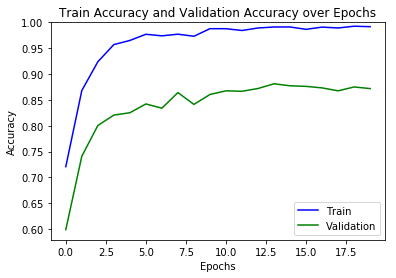

In [25]:
sign_pipeline(X_train, y_train, X_validation, y_validation, input_shape=(None, 32, 32, 3), n_classes=43, \
                  conv1_shape=(5, 5, 3, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network06.ckpt')

Train accuracy increased but validation accuracy kept the same.

**Apply normalization and grayscale pre-processing and double network settings**

Training...

EPOCH 1 ...
Train Accuracy = 0.954
Validation Accuracy = 0.864
EPOCH 2 ...
Train Accuracy = 0.986
Validation Accuracy = 0.901
EPOCH 3 ...
Train Accuracy = 0.984
Validation Accuracy = 0.901
EPOCH 4 ...
Train Accuracy = 0.997
Validation Accuracy = 0.918
EPOCH 5 ...
Train Accuracy = 0.997
Validation Accuracy = 0.918
EPOCH 6 ...
Train Accuracy = 0.996
Validation Accuracy = 0.913
EPOCH 7 ...
Train Accuracy = 1.000
Validation Accuracy = 0.927
EPOCH 8 ...
Train Accuracy = 1.000
Validation Accuracy = 0.936
EPOCH 9 ...
Train Accuracy = 1.000
Validation Accuracy = 0.934
EPOCH 10 ...
Train Accuracy = 1.000
Validation Accuracy = 0.938
EPOCH 11 ...
Train Accuracy = 1.000
Validation Accuracy = 0.934
EPOCH 12 ...
Train Accuracy = 1.000
Validation Accuracy = 0.937
EPOCH 13 ...
Train Accuracy = 1.000
Validation Accuracy = 0.934
EPOCH 14 ...
Train Accuracy = 0.990
Validation Accuracy = 0.920
EPOCH 15 ...
Train Accuracy = 0.996
Validation Accuracy = 0.923
EPOCH 16 ...
Train Accuracy = 1.000


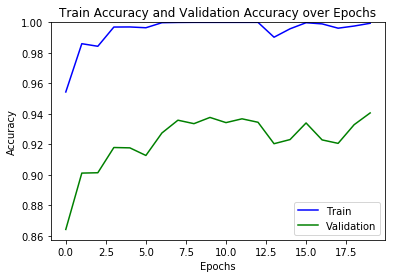

In [26]:
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=20, batch_size=128, learning_rate=0.001, save_path='checkpoint/network07.ckpt')

This model got better performance but the accuracy was variant. I may need to increase number of epochs and decrease the learning rate.

**Increase Number of Epochs, Descrease Learning rate with the double network settings**

Training...

EPOCH 1 ...
Train Accuracy = 0.877
Validation Accuracy = 0.773
EPOCH 2 ...
Train Accuracy = 0.941
Validation Accuracy = 0.824
EPOCH 3 ...
Train Accuracy = 0.972
Validation Accuracy = 0.868
EPOCH 4 ...
Train Accuracy = 0.985
Validation Accuracy = 0.878
EPOCH 5 ...
Train Accuracy = 0.990
Validation Accuracy = 0.880
EPOCH 6 ...
Train Accuracy = 0.995
Validation Accuracy = 0.899
EPOCH 7 ...
Train Accuracy = 0.998
Validation Accuracy = 0.895
EPOCH 8 ...
Train Accuracy = 0.994
Validation Accuracy = 0.890
EPOCH 9 ...
Train Accuracy = 0.999
Validation Accuracy = 0.913
EPOCH 10 ...
Train Accuracy = 0.998
Validation Accuracy = 0.905
EPOCH 11 ...
Train Accuracy = 0.992
Validation Accuracy = 0.893
EPOCH 12 ...
Train Accuracy = 0.998
Validation Accuracy = 0.911
EPOCH 13 ...
Train Accuracy = 1.000
Validation Accuracy = 0.920
EPOCH 14 ...
Train Accuracy = 0.999
Validation Accuracy = 0.911
EPOCH 15 ...
Train Accuracy = 1.000
Validation Accuracy = 0.915
EPOCH 16 ...
Train Accuracy = 1.000


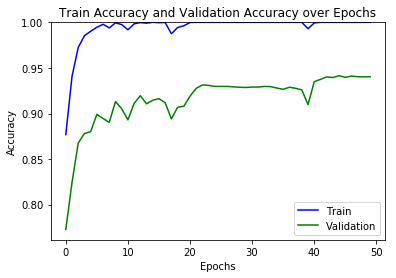

In [27]:
sign_pipeline(X_train_pre, y_train, X_validation_pre, y_validation, input_shape=(None, 32, 32, 1), n_classes=43, \
                  conv1_shape=(5, 5, 1, 12), conv2_shape=(5, 5, 12, 32), fc1_shape=(800, 240), fc2_shape=(240, 43), \
                  epochs=50, batch_size=128, learning_rate=0.0005, save_path='checkpoint/network08.ckpt')

With learning rate=0.0005, the validation accuracy is less variant and get stable accuracy at epoch=20.

This model can get the required validation accuracy > 0.93 and run stablely. So I stopped the training process here.

The final model is as below

In [28]:
###########################
X_train_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_train])
X_validation_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_validation])
X_test_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_test])
input_shape=(None, 32, 32, 1) 
n_classes=43 
                  
conv1_shape=(5, 5, 1, 12) 
conv2_shape=(5, 5, 12, 32) 
fc1_shape=(800, 240) 
fc2_shape=(240, 43)
                  
epochs=40 
batch_size=128 
learning_rate=0.0005
save_path='checkpoint/network_final.ckpt'

# Features and Labels
# Train cnn to classify sign data. 
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
#input_shape=(None, 32, 32, 3)
x = tf.placeholder(tf.float32, input_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Training Pipeline: Create a training pipeline that uses the model to classify sign data.
signs = sign_cnn(x, conv1_shape, conv2_shape, fc1_shape, fc2_shape)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=signs)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation: Evaluate how well the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Model testing
prediction = tf.argmax(signs, 1, name='prediction')
probability = tf.nn.softmax(signs, name='probability')
k = tf.placeholder(tf.int32, name='k')
top_k = tf.nn.top_k(probability, k=k) 

saver = tf.train.Saver()

# Train the Model: Run the training data through the training pipeline to train the model. 
# Before each epoch, shuffle the training set. 
# After each epoch, measure the loss and accuracy of the validation set. 
# Save the model after training.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    train_accuracy=[]
    validation_accuracy =[]
    for i in range(epochs):
        X_train_pre, y_train = shuffle(X_train_pre, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train_pre[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        train_accuracy.append(evaluate(X_train_pre, y_train, accuracy_operation, batch_size, x, y))
        validation_accuracy.append(evaluate(X_validation_pre, y_validation, accuracy_operation, batch_size, x, y))
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy[i]))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))

    saver.save(sess, save_path)
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.904
Validation Accuracy = 0.800
EPOCH 2 ...
Train Accuracy = 0.962
Validation Accuracy = 0.856
EPOCH 3 ...
Train Accuracy = 0.980
Validation Accuracy = 0.891
EPOCH 4 ...
Train Accuracy = 0.990
Validation Accuracy = 0.897
EPOCH 5 ...
Train Accuracy = 0.993
Validation Accuracy = 0.903
EPOCH 6 ...
Train Accuracy = 0.997
Validation Accuracy = 0.908
EPOCH 7 ...
Train Accuracy = 0.996
Validation Accuracy = 0.913
EPOCH 8 ...
Train Accuracy = 0.995
Validation Accuracy = 0.920
EPOCH 9 ...
Train Accuracy = 0.998
Validation Accuracy = 0.918
EPOCH 10 ...
Train Accuracy = 1.000
Validation Accuracy = 0.928
EPOCH 11 ...
Train Accuracy = 1.000
Validation Accuracy = 0.912
EPOCH 12 ...
Train Accuracy = 1.000
Validation Accuracy = 0.924
EPOCH 13 ...
Train Accuracy = 1.000
Validation Accuracy = 0.926
EPOCH 14 ...
Train Accuracy = 0.998
Validation Accuracy = 0.926
EPOCH 15 ...
Train Accuracy = 0.994
Validation Accuracy = 0.925
EPOCH 16 ...
Train Accuracy = 0.999


### Test dataset

In [29]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    testing_accuracy = evaluate(X_test_pre, y_test, accuracy_operation, batch_size, x, y)
    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

Testing Accuracy = 0.923


---

## Step 3: Test a Model on New Images

### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.



### 1. Load and Output the Images

Here are ten German traffic signs that I found on the web:

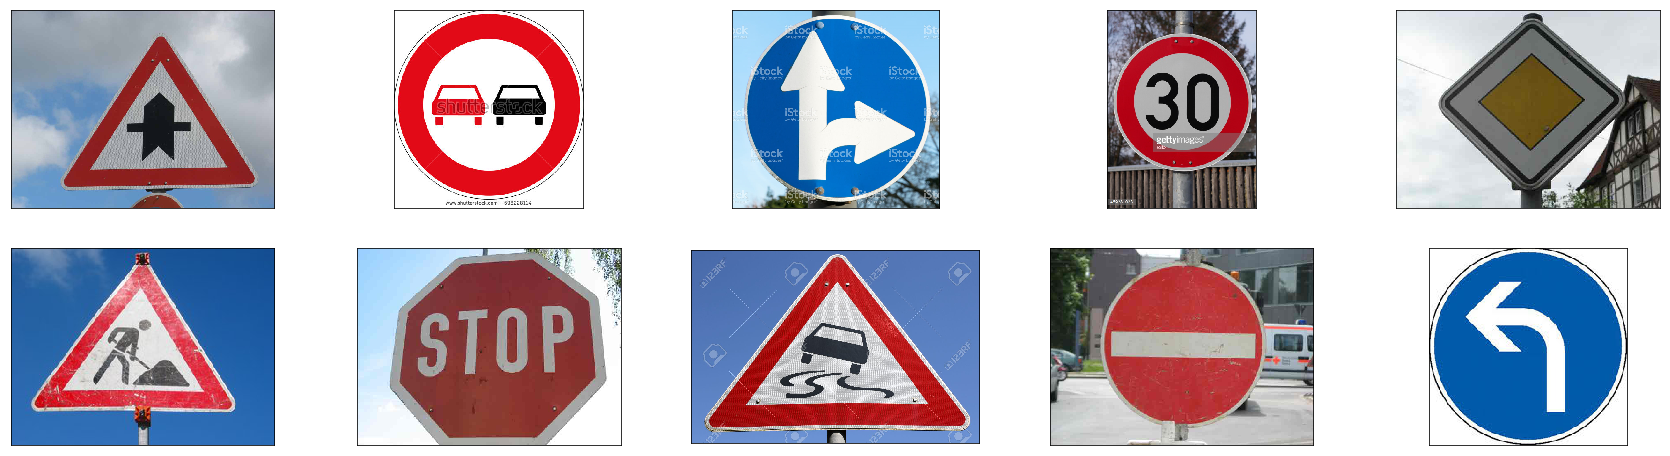

In [30]:
def read_image(img_path):
    img = cv2.imread(img_path)
    # This is because cv2 read images in (b,g,r)
    (b, g, r)=cv2.split(img)
    img=cv2.merge([r,g,b])
    return img

import glob
X_new_path = np.array(glob.glob('images/image*.jpg') + 
                 glob.glob('images/image*.png') + glob.glob('images/image*.jpeg'))
X_new = np.array([read_image(path) for path in X_new_path])

plt.figure(figsize=(30,8))
for i in range(X_new.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_new[i])
    plt.xticks([]), plt.yticks([])    
plt.show()


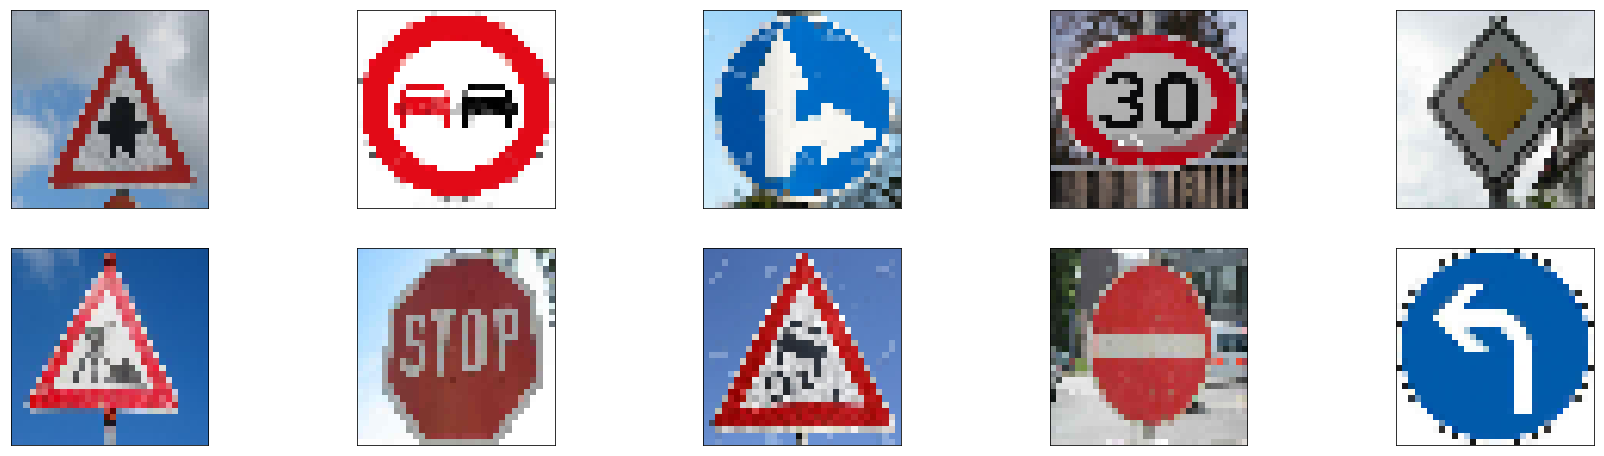

In [31]:
def resize_image(img, shape=(32,32), interpolation=cv2.INTER_CUBIC):
    return cv2.resize(img, shape, interpolation)

X_new_re = np.array([resize_image(x, shape=(32,32), interpolation=cv2.INTER_CUBIC) for x in X_new])
plt.figure(figsize=(30,8))
for i in range(X_new_re.shape[0]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_new_re[i])
    plt.xticks([]), plt.yticks([])    
plt.show()
X_new_pre = np.array([normalize(grayscale(x), method=2)[:,:,np.newaxis] for x in X_new_re])

### 2. Predict the Sign Type for Each Image and Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [32]:
with tf.Session() as sess:
    saver.restore(sess, save_path)
    
    num_examples = len(X_new_pre)
    sess = tf.get_default_session()
    prediction_output = []
    probability_output = []
    for offset in range(0, num_examples, batch_size):
        batch_x = X_new_pre[offset:offset+batch_size]
        prediction_output.append(sess.run(prediction, feed_dict={x: batch_x}))
        probability_output.append(sess.run([probability, top_k],
                         feed_dict={x: batch_x, k: 5}))
           
    print("Prediction Result = \n{}".format(prediction_output))
    print("Probability Result = \n{}".format(probability_output))

Prediction Result = 
[array([11, 41, 26,  1, 12, 25, 14, 23, 17, 11])]
Probability Result = 
[[array([[  0.00000000e+00,   1.84701191e-34,   0.00000000e+00,
          9.21651152e-38,   0.00000000e+00,   0.00000000e+00,
          5.64719335e-31,   1.66267998e-37,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.57778350e-30,   2.27118512e-21,   0.00000000e+00,
          9.12942137e-22,   0.00000000e+00,   3.62334356e-34,
          2.70215363e-30,   4.50924041e-33,   9.42642879e-33,
          5.80915876e-26,   1.78794129e-25,   0.00000000e+00,
          7.77313559e-24,   0.00000000e+00,   0.00000000e+00,
          7.51384084e-37,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.56095188e-32,   0.00000000e+00,
          0.00000000e+00],
       [  

Below is the prediction results of new images.

In [33]:
ind = list(prediction_output[0])
print(signnames['SignName'][ind])

11    Right-of-way at the next intersection
41                        End of no passing
26                          Traffic signals
1                      Speed limit (30km/h)
12                            Priority road
25                                Road work
14                                     Stop
23                            Slippery road
17                                 No entry
11    Right-of-way at the next intersection
Name: SignName, dtype: object


To describe how certain the model is when predicting on each of the ten new images, looking at the softmax probabilities for each prediction. Below code provided the top 5 softmax probabilities for each image along with the sign type of each probability. 


Image 1


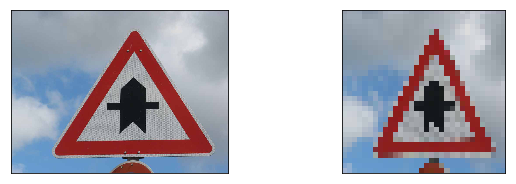

11  Right-of-way at the next intersection: 100.00%
19  Dangerous curve to the left:  0.00%
21  Double curve:  0.00%
30  Beware of ice/snow:  0.00%
28  Children crossing:  0.00%

Image 2


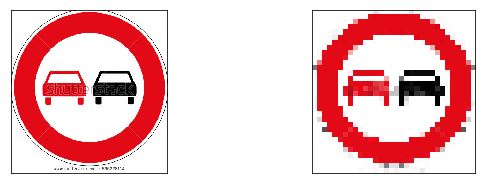

41  End of no passing: 100.00%
16  Vehicles over 3.5 metric tons prohibited:  0.00%
9  No passing:  0.00%
20  Dangerous curve to the right:  0.00%
40  Roundabout mandatory:  0.00%

Image 3


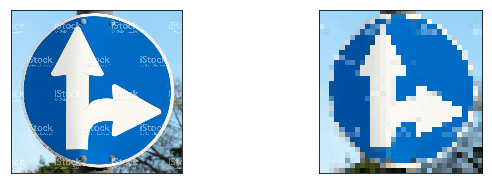

26  Traffic signals: 63.16%
18  General caution: 36.84%
36  Go straight or right:  0.00%
32  End of all speed and passing limits:  0.00%
38  Keep right:  0.00%

Image 4


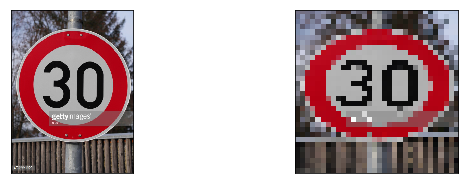

1  Speed limit (30km/h): 99.87%
14  Stop:  0.13%
18  General caution:  0.00%
0  Speed limit (20km/h):  0.00%
5  Speed limit (80km/h):  0.00%

Image 5


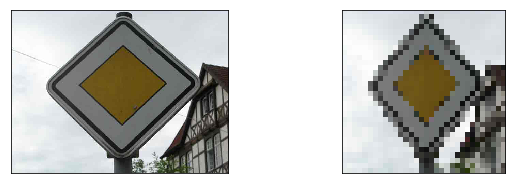

12  Priority road: 100.00%
9  No passing:  0.00%
40  Roundabout mandatory:  0.00%
14  Stop:  0.00%
35  Ahead only:  0.00%

Image 6


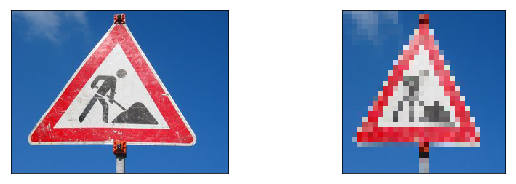

25  Road work: 99.95%
31  Wild animals crossing:  0.05%
29  Bicycles crossing:  0.00%
22  Bumpy road:  0.00%
23  Slippery road:  0.00%

Image 7


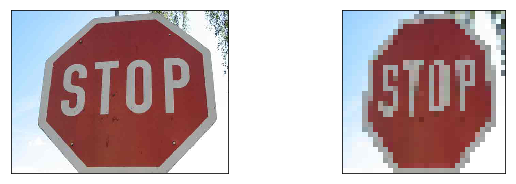

14  Stop: 99.99%
33  Turn right ahead:  0.01%
40  Roundabout mandatory:  0.00%
25  Road work:  0.00%
26  Traffic signals:  0.00%

Image 8


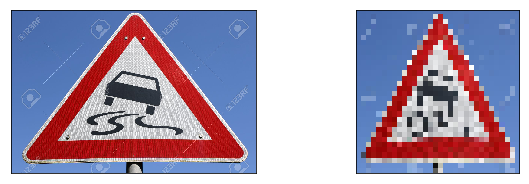

23  Slippery road: 56.48%
11  Right-of-way at the next intersection: 43.40%
30  Beware of ice/snow:  0.12%
28  Children crossing:  0.00%
24  Road narrows on the right:  0.00%

Image 9


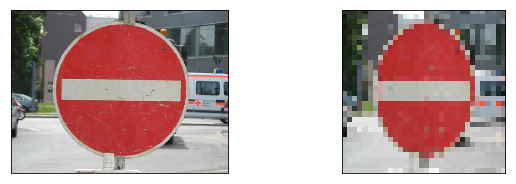

17  No entry: 100.00%
33  Turn right ahead:  0.00%
9  No passing:  0.00%
26  Traffic signals:  0.00%
0  Speed limit (20km/h):  0.00%

Image 10


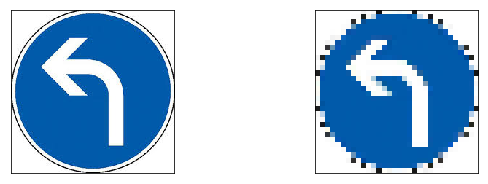

11  Right-of-way at the next intersection: 89.98%
34  Turn left ahead:  9.81%
38  Keep right:  0.21%
26  Traffic signals:  0.00%
0  Speed limit (20km/h):  0.00%


In [81]:
for id in range(len(probability_output[0][1][0])):
    print()
    print("Image {}".format(id+1))
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.imshow(X_new[id])
    plt.xticks([]), plt.yticks([])    
    plt.subplot(1, 2, 2)
    plt.imshow(X_new_re[id])
    plt.xticks([]), plt.yticks([])  
    plt.show()
    top_5_prob = probability_output[0][1][0][id]*100
    top_5_ind = probability_output[0][1][1][id]
    result = np.array(signnames['SignName'][top_5_ind])
    for idx in range(len(top_5_prob)):
        print("{}  {}: {:5.2f}%".format(top_5_ind[idx], result[idx], top_5_prob[idx]))

### Analyze Performance

8 out of 10 are correct. The accuracy is 80% on random new images from the web. This compares favorably to the accuracy on the test set of 92.3%

Image 3: Go straight or right : The model predicted as Traffic signals at probability of 63.16%. This image letters on the sign area, which may confuse the machine prediction.

Image 10: Turn left ahead : The model predicted as Right-of-way at the next intersection at probability of 89.98% even though the image after resizing looked clear for human eyes. Turn left ahead is the next probability at 9.81%

Image 8: Slippery road: Model believed it as Slippery road at probability of 56.48% while as Right-of-way at the next intersection at probability of 43.40%. I believed because the resized image was not clear and look like a Right-of-way at the next intersection also. I may need better resizing method.

## Disscussion

The model worked as expected with required validation accuracy is larger than 0.94 and test acrracy is 0.923.

This model can be more improved with preprocessing methods such as image augmentation. This was run in this project but need more time to run with more epochs to prove the accuracy.

More data can be added for classes which has less number of examples for better balancing distribution when training with image augmentation methods.

In addition, better resizing method should be considered to get better result for predicting new images.